In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.experiments import *
from LIMxCMBL.kernels import *
import matplotlib.pyplot as plt

In [2]:
nurest = cu.c/(21.106114054160 * u.cm)
Ofield = experiments['CHIME']['Omega_field']
dnu = (800 * u.MHz - 400 * u.MHz)/(256 * 4)

In [3]:
nuobs = np.linspace(617, 710,1000) * u.MHz
B = max(nuobs) - min(nuobs)
lobs = cu.c/nuobs
zobs = (nurest /nuobs - 1).si

In [4]:
Tsys = 55*u.K
Ssky = 31000 * u.deg**2

ttot = 1*u.yr
Nant = 256
npol = 2
Ncyl = 4
wcyl = 20*u.m
dant = 0.3048 * u.m
lcyl = dant * Nant

In [5]:
eta = 0.7
Ae = eta * lcyl/Nant * wcyl
Obeam = ((lobs**2/Ae)) * u.sr
du2 = (2*np.pi)**2/Obeam
du = np.sqrt(du2)

SFOV = (90*u.deg * (lobs/wcyl *(u.rad)))

In [6]:
bmin = 0.3048 * u.m
bmax = 102 * u.m
Db = (bmax - bmin)
umin = bmin / lobs * 1/u.rad
umax = bmax / lobs * 1/u.rad
Ndish = Nant * Ncyl

tp = ttot * SFOV / Ofield

In [7]:
n_u_z = Ndish * (Ndish - 1) / (2 * np.pi) / (umax**2 - umin**2)
N_dU = (n_u_z * du**2).si
print(N_dU[:10]) #independent of observing
N_dU_fid = N_dU[0]

N_u = ((umax-umin)/du).si

[2699.61598859 2699.61598859 2699.61598859 2699.61598859 2699.61598859
 2699.61598859 2699.61598859 2699.61598859 2699.61598859 2699.61598859]


In [8]:
tot_polar_bins = (np.pi*(umax**2-umin**2)/du**2).si 
#evaluate the sum in discrete case and pretends it holds in continous

In [9]:
((N_dU_fid  * tot_polar_bins)/(Ndish * (Ndish - 1)/2))
#total number of polar bins is consistent

<Quantity [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1.

In [10]:
PeT = (Tsys ** 2 
      / tp
      / dnu 
       / npol 
      / (N_dU_fid))

In [11]:
PeV = (PeT * Obeam**2 *
       (2 * cu.k_B * nuobs**2 / cu.c**2)**2 / u.sr**2).to(u.mJy**2)

In [12]:
PeI_dV = 1/(2*np.pi)**4 * np.pi * du**2 * (umax**2 - umin**2) * PeV

In [13]:
PeI = (PeI_dV 
       * dnu / nuobs 
       * nurest/nuobs 
       * Obeam/u.sr * Gamma_nu(nuobs, nurest)).to((u.kJy/u.sr)**2*u.Mpc**3)

In [14]:
PeI[499]

<Quantity 0.83107468 kJy2 Mpc3 / sr2>

In [15]:
u_f = u.Mpc**3 * (u.kJy/u.sr)**2

In [16]:
PeI[499]

<Quantity 0.83107468 kJy2 Mpc3 / sr2>

In [17]:
a,b = CHIME_Pei()

In [18]:
b/PeI

<Quantity [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1.

In [19]:
b[499]

<Quantity 0.83107468 kJy2 Mpc3 / sr2>

In [20]:
#try and check inuitive more rigorouslyb

In [82]:
fids = {
    'Tsys': 55,
    'Nant': 256,
    'npol': 2,
    'Ncyl': 4,
    'Ofield': experiments['CHIME']['Omega_field'].value,
    'ttot': 1,
    'eta': 0.7,
    'dant':0.3048,
    'wcyl': 20,
}
fids_unit={
    'Tsys': u.K,
    'Nant': 1,
    'npol': 1,
    'Ncyl': 1,
    'Ofield':experiments['CHIME']['Omega_field'].unit,
    'ttot': u.yr,
    'eta': 1,
    'dant':u.m,
    'wcyl': u.m,
}

scalings = {
    'Tsys': 2,
    'Nant': -2,
    'npol' : -1,
    'Ncyl':-2,
    'Ofield': 1,
    'ttot': -1,
    'eta': -3,
    'dant':-3,
    'wcyl': -2,
}

In [83]:
a,b = CHIME_Pei()

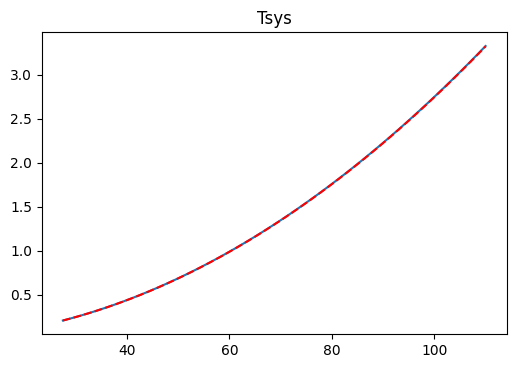

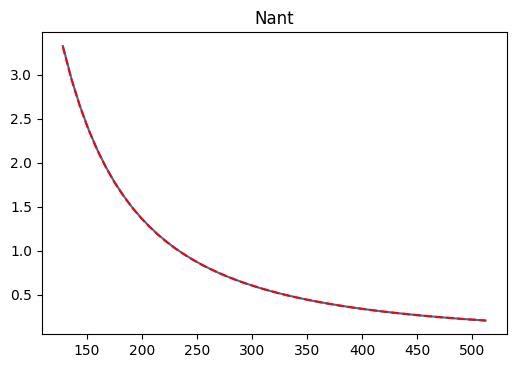

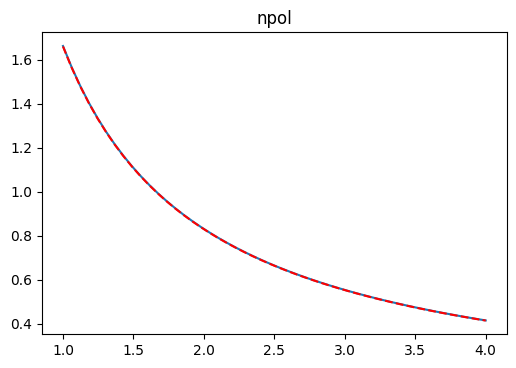

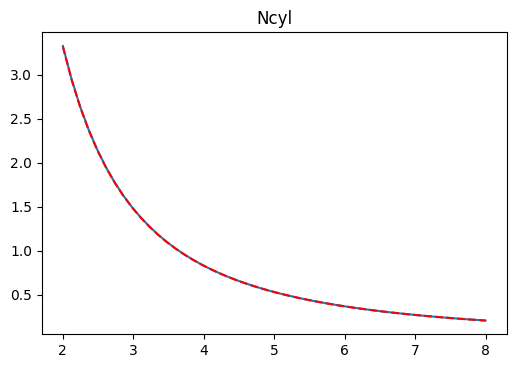

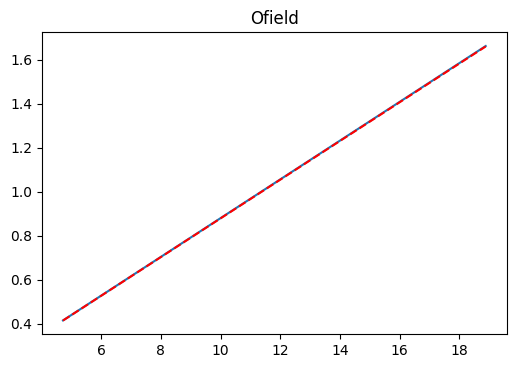

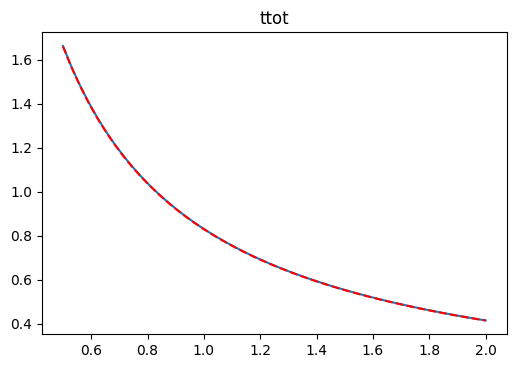

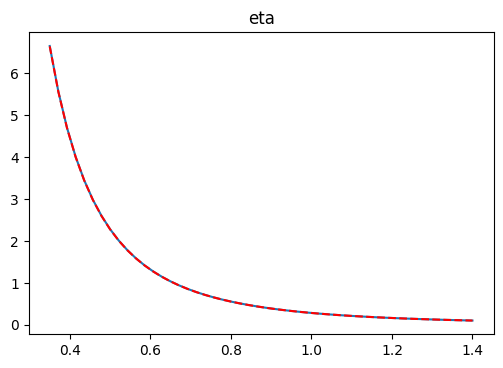

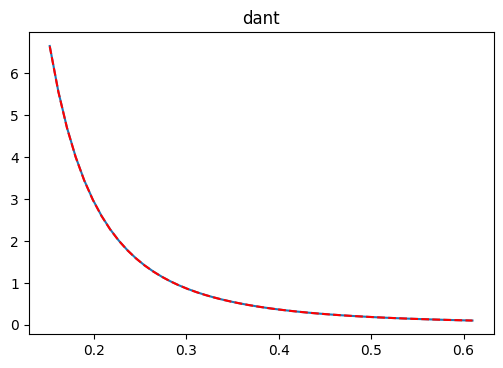

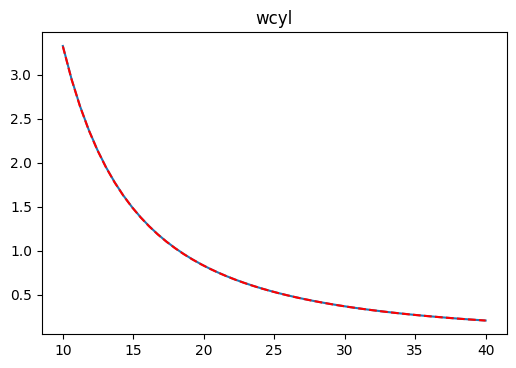

In [85]:
fid_Pei = 0.83 * u.Mpc**3 * (u.kJy/u.sr)**2
fid_Pei = (fid_Pei/u_f).si
for _param in fids_unit:
    fid = fids[_param]
    scaling = scalings[_param]
    params = np.linspace(fid/2, fid*2) * fids_unit[_param]
    args = [{_param:p} for p in params]
    vals = [CHIME_Pei(**arg) for arg in args ]
    vals = [(val[1][499]/u_f).si for val in vals]
    plt.figure(dpi = 100)
    plt.title(_param)
    plt.plot(params, vals)
    plt.plot(params, fid_Pei*(params/(fid * fids_unit[_param]))**scaling, 'r--')
    plt.show()


In [86]:
a[499]

<Quantity 663.45345345 MHz>

In [87]:
Gamma_nu(a[499], nurest).to(u.Gpc**3)

<Quantity 32.10969241 Gpc3>

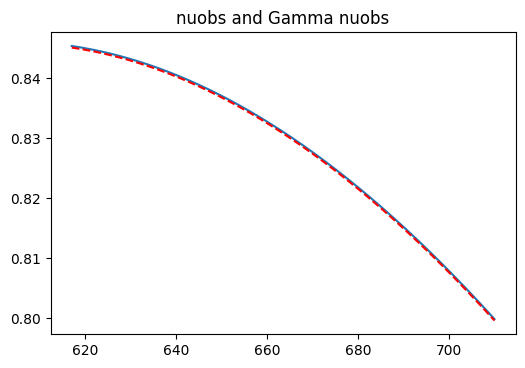

In [88]:
nuobs, fid_Pei_2 = CHIME_Pei()
plt.figure(dpi = 100)
plt.title('nuobs and Gamma nuobs')
plt.plot(nuobs, fid_Pei_2)
plt.plot(nuobs, fid_Pei*(nuobs/(663 * u.MHz)).si
         *(Gamma_nu(nuobs, nurest)/(32.1 * u.Gpc**3)).si, 'r--')
plt.show()